In [40]:
#seaborn 설치하기
#보다 나은 시각화를 제공해준다
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


문제 정의
장소별 범죄유형을 분석하여 범죄 예방에 조금이나마 도움이 되도록 한다. 
사람이 적은 곳이나 야외에서는 강력범죄나 폭력 범죄가 많을 거 같고 지능 범죄는 실내에서 많이 발생할 거 같다.

데이터 선택
공공 데이터 포털의 경찰청에서 나온 장소별 범죄 통계 데이터를 사용하였습니다. (https://www.data.go.kr/data/3074463/fileData.do)

In [3]:
# 각종 라이브러리 import
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# csv파일 읽어보고 확인해보기
# 한글 파일이므로 인코딩 방식 지정
df = pd.read_csv("./경찰청_범죄 발생 장소별 통계_20221231.csv",encoding='EUC-KR')
df.head()

# 데이터 출처
# https://www.data.go.kr/data/3074463/fileData.do

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,...,1,3,3,0,0,0,5,0,0,17
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,...,1,3,0,0,0,0,5,2,1,33
2,강력범죄,강도,62,46,0,141,0,12,32,1,...,0,3,0,0,1,0,21,1,4,30
3,강력범죄,강간,1616,880,0,158,0,2,3,0,...,7,9,0,1,0,1,45,48,3,560
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,2,5,0,0,2,0,7,12,1,111


Text(0.5, 1.0, '범죄대분류')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN

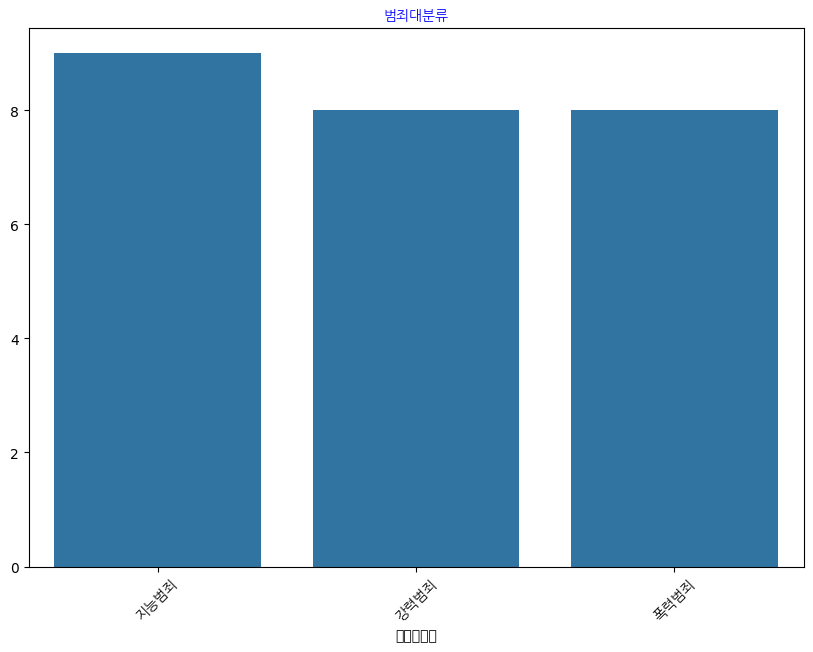

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 설정
font_path = './NanumGothic.ttf'
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# 밤죄 대분류중 제일 많은 3가지를 선택하여 갯수들을 그래프화 한다
# 범죄량이 아닌 범죄의 종류 갯수이다
df = df[(df['범죄대분류'] == '강력범죄') | (df['범죄대분류'] == '폭력범죄') | (df['범죄대분류'] == '지능범죄')]
top = df['범죄대분류'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45,fontproperties=fontprop) # 한글 폰트 지정을 위해 fontproperties=fontprop 를 추가한다
plt.title('범죄대분류',color = 'blue',fontproperties=fontprop)

In [33]:
# 전에 설정한 범죄 대분류 3가지 말고 다른 데이터들은 사라진것을 볼 수 있다
df.head(20)

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,...,1,3,3,0,0,0,5,0,0,17
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,...,1,3,0,0,0,0,5,2,1,33
2,강력범죄,강도,62,46,0,141,0,12,32,1,...,0,3,0,0,1,0,21,1,4,30
3,강력범죄,강간,1616,880,0,158,0,2,3,0,...,7,9,0,1,0,1,45,48,3,560
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,2,5,0,0,2,0,7,12,1,111
5,강력범죄,강제추행,1619,983,11,3098,34,86,277,11,...,45,32,2,20,8,0,114,65,37,1597
6,강력범죄,기타 강간?강제추행등,71,54,0,16,0,0,0,0,...,0,0,0,0,0,0,1,6,0,17
7,강력범죄,방화,331,274,1,207,0,5,6,1,...,2,15,4,0,0,2,32,8,3,93
9,폭력범죄,상해,4160,2570,35,9150,13,88,126,12,...,61,130,22,14,5,6,592,51,53,1859
10,폭력범죄,폭행,23017,12150,190,45258,134,476,1426,98,...,180,217,41,64,36,3,3018,194,257,8368


Text(0.5, 0, '기타')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

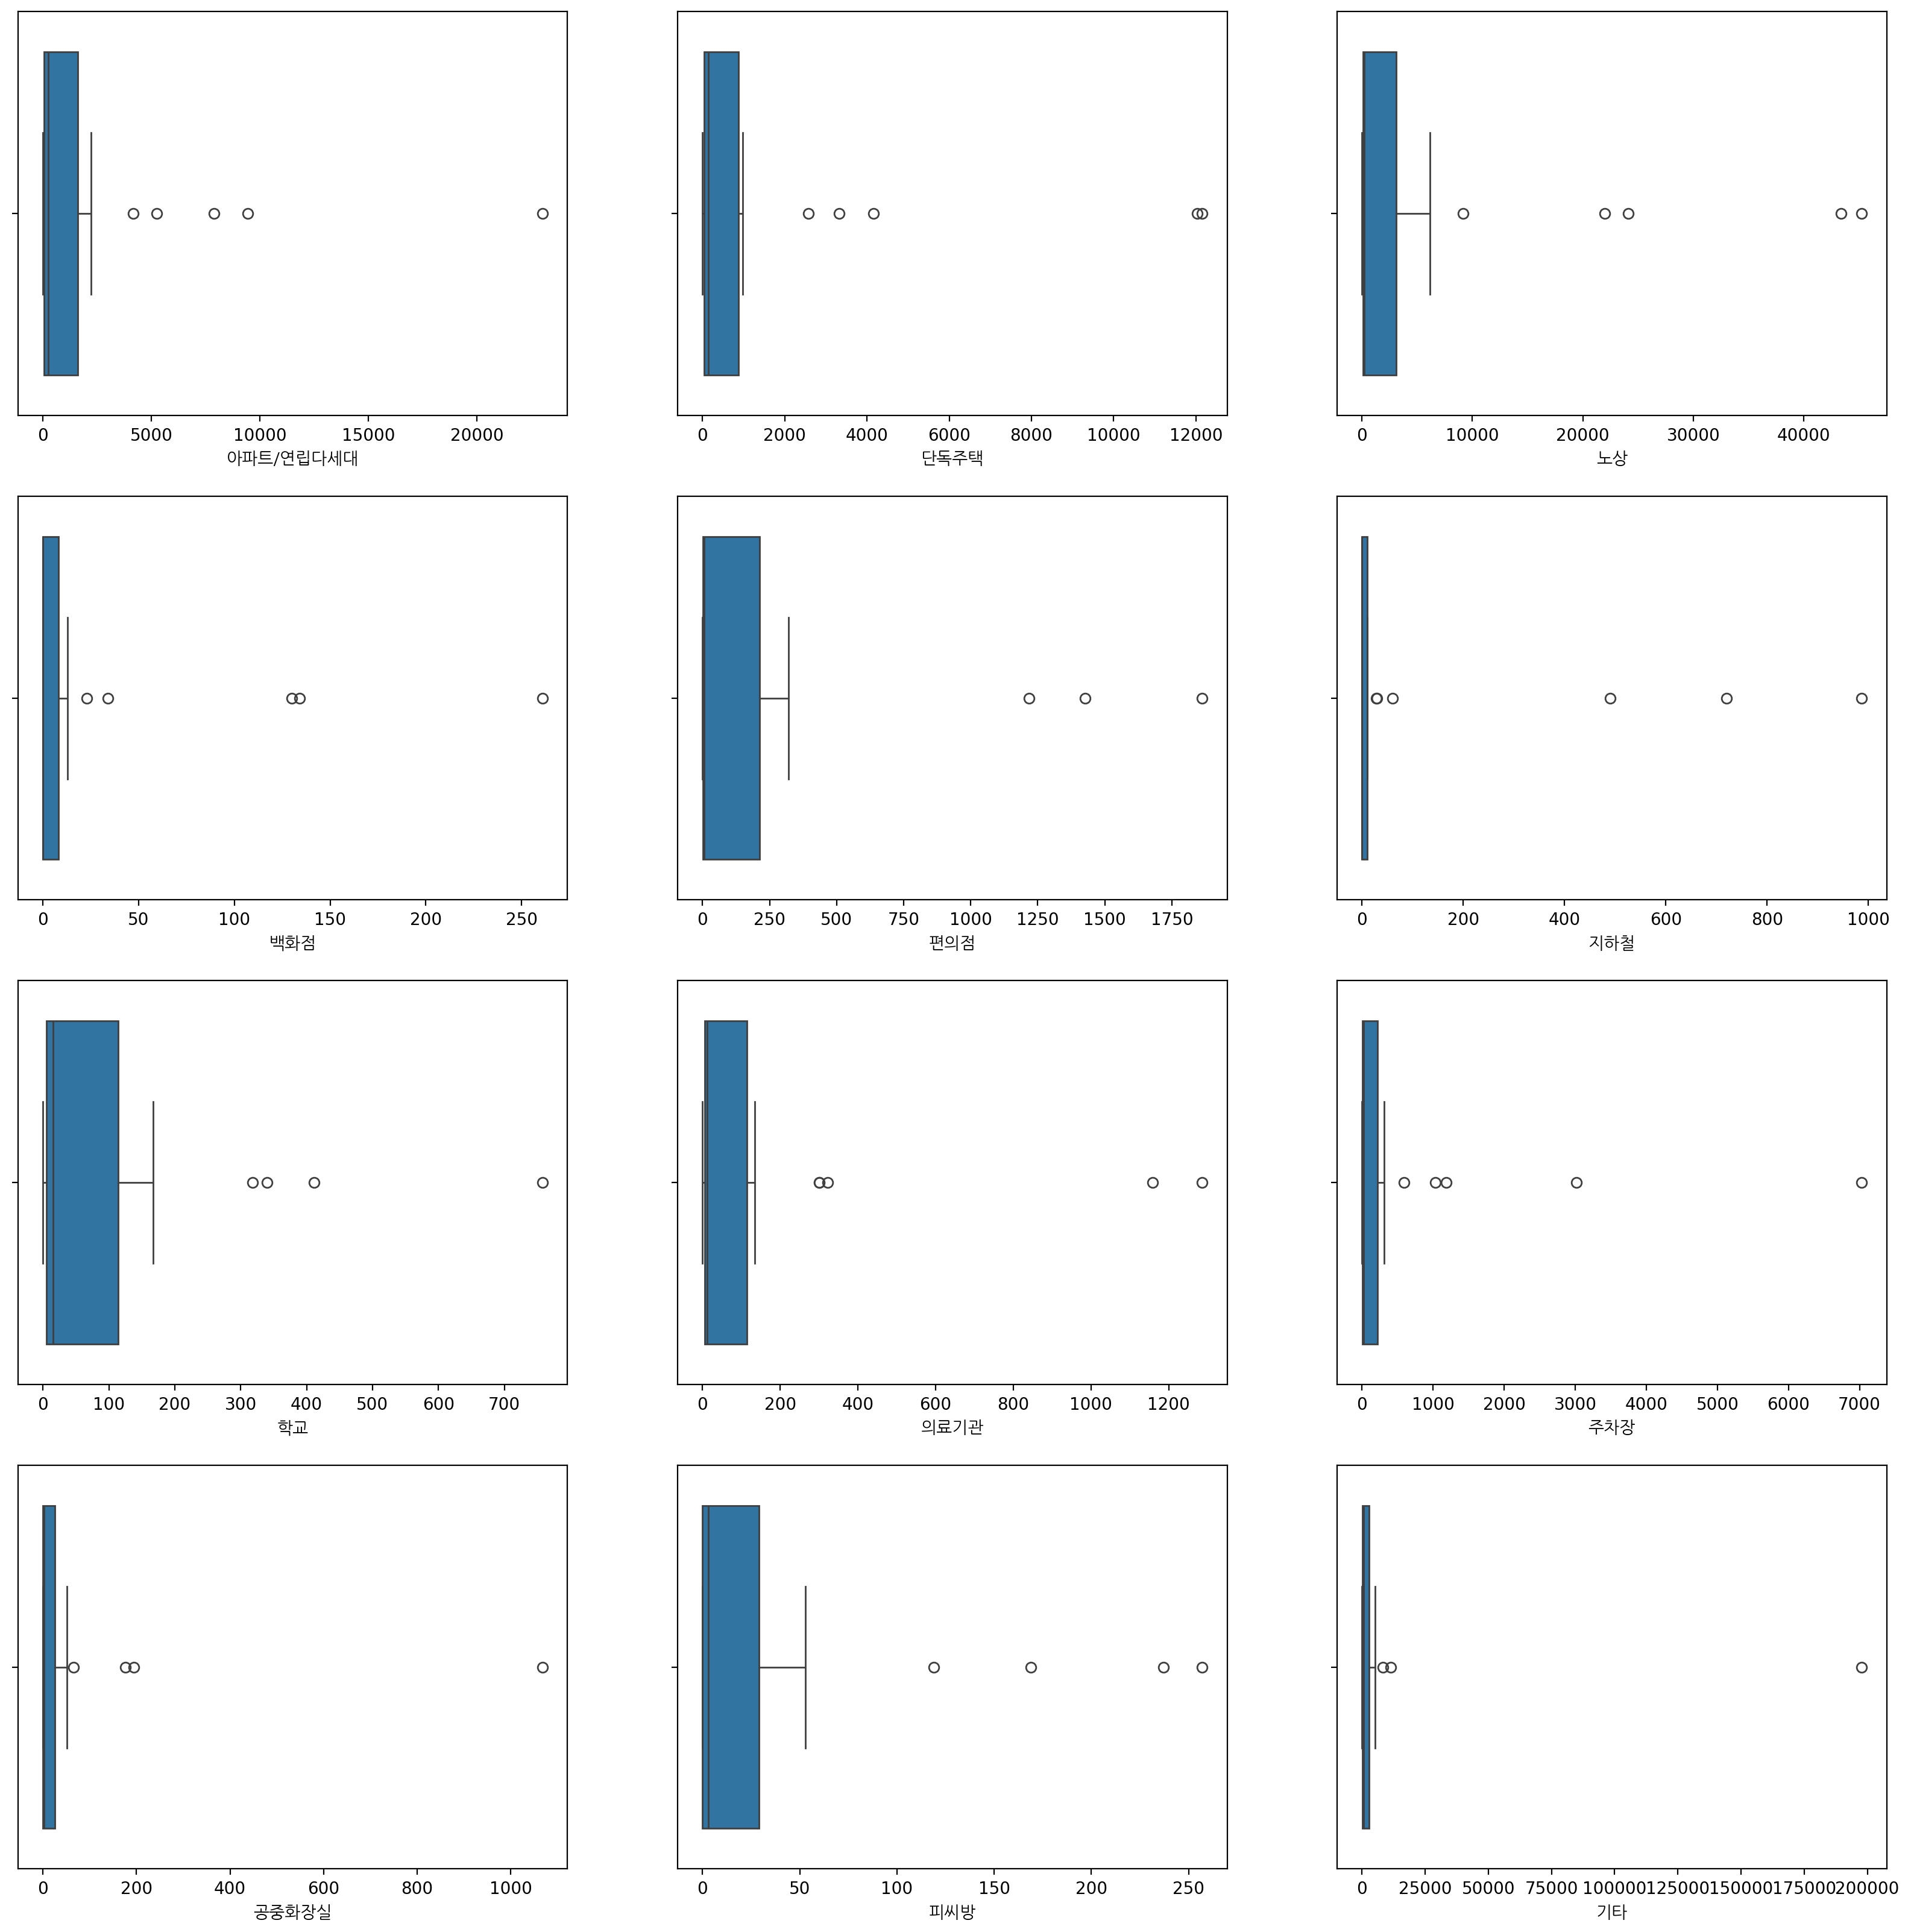

In [34]:
# 범죄 장소중 우리가 흔히 가는 장소들로만 뽑아서 박스플롯을 그려본다
# 보통 이상값들이 있다고 나오지만 데이터 특성상 어떠한 범죄들은 특정 장소에서 매우 많이 발생 하므로 저럴 수 있다

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x='아파트_연립다세대', data=df)
plt.xlabel('아파트/연립다세대', fontproperties=fontprop)  # x 축 레이블 설정(한글 폰트를 사용하기 위함)(안하면 깨져서 나온다)

plt.subplot(4,3,2)
sns.boxplot(x='단독주택', data=df)
plt.xlabel('단독주택', fontproperties=fontprop) 

plt.subplot(4,3,3)
sns.boxplot(x='노상', data=df)
plt.xlabel('노상', fontproperties=fontprop) 

plt.subplot(4,3,4)
sns.boxplot(x='백화점', data=df)
plt.xlabel('백화점', fontproperties=fontprop)  

plt.subplot(4,3,5)
sns.boxplot(x='편의점', data=df)
plt.xlabel('편의점', fontproperties=fontprop)  

plt.subplot(4,3,6)
sns.boxplot(x='지하철', data=df)
plt.xlabel('지하철', fontproperties=fontprop)  

plt.subplot(4,3,7)
sns.boxplot(x='학교', data=df)
plt.xlabel('학교', fontproperties=fontprop)  

plt.subplot(4,3,8)
sns.boxplot(x='의료기관', data=df)
plt.xlabel('의료기관', fontproperties=fontprop) 

plt.subplot(4,3,9)
sns.boxplot(x='주차장', data=df)
plt.xlabel('주차장', fontproperties=fontprop)  

plt.subplot(4,3,10)
sns.boxplot(x='공중화장실', data=df)
plt.xlabel('공중화장실', fontproperties=fontprop)  

plt.subplot(4,3,11)
sns.boxplot(x='피씨방', data=df)
plt.xlabel('피씨방', fontproperties=fontprop) 

plt.subplot(4,3,12)
sns.boxplot(x='기타', data=df)
plt.xlabel('기타', fontproperties=fontprop)  

In [35]:
# 비슷한 그래프를 보여주는 5개를 선택한 후 학습을 준비한다

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('범죄대분류','아파트_연립다세대','단독주택','노상','편의점','피씨방')]

y = df['범죄대분류']

X['범죄대분류'] = le.fit_transform(X['범죄대분류'])

# X = scaler.fit_transform(X)

y = le.transform(y)



In [36]:
# 클러스터 갯수를 3개로 설정
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# 데이터 들을 예상해본다
# 0이면 강력범죄 1이면 폭력범죄 2이면 지능범죄로 예상된 것이다

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 0], dtype=int32)

In [37]:
# 실루엣 점수를 평가해본다
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score
# 실루엣 점수는 -1~1 사이의 값으로 측정된다
# 0.82가 나온것은 높게 나온 수치이다
# 데이터 수가 적기 때문도 있다

0.8291091682812061

In [38]:
#  KMeans 알고리즘을 사용하여 적절한 클러스터 갯수를 알아보자

from sklearn.cluster import KMeans
wcss = []
# 1부터 10까지 늘려가며 최적의 클러스터를 찾는다
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

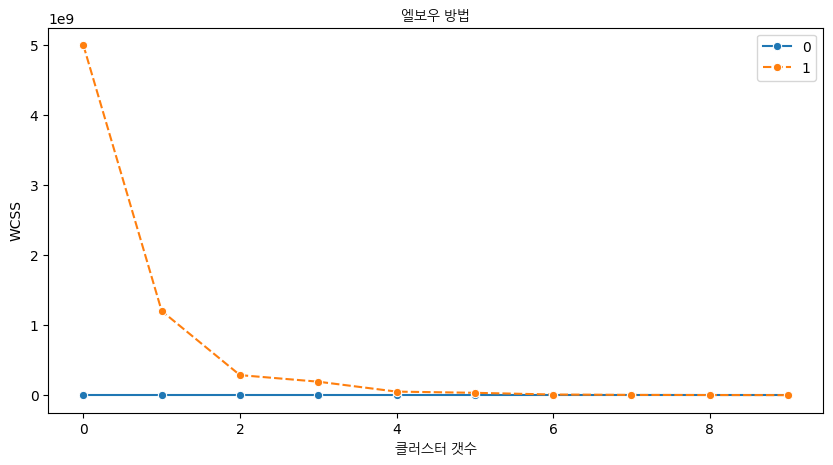

In [39]:
# 꺾임이 거의 없어지는 부분의 x값이 최적의 클러스터 갯수이다
# 그래프에선 3개가 최적으로 보인다
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('엘보우 방법', fontproperties=fontprop)
plt.xlabel('클러스터 갯수', fontproperties=fontprop)
plt.ylabel('WCSS')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

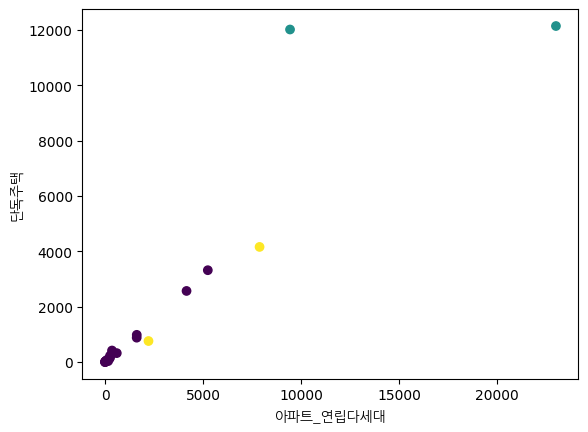

In [40]:
# kMeans 알고리즘을 사용하여 아파트_연립다세대와 단독주택 변수에 대한 산점도를 그린다
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['아파트_연립다세대'],df['단독주택'],c = labels)
plt.xlabel('아파트_연립다세대',fontproperties=fontprop)
plt.ylabel('단독주택',fontproperties=fontprop)
plt.show()

In [41]:
# kMeans 모델에 대한 평가를한다
# 정확도는 40%가 나온것을 확인 할 수 있다
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 10 out of 25 samples were correctly labeled.
Accuracy score: 0.40


This data is too imbalanced, too little correlated and there is too much variance between the column values to cluster well. In fact, the clusters that form are probably heavily influenced or skewed by the three genre categories we defined above.

In Scikit-learn's documentation, you can see that a model like this one, with clusters not very well demarcated, has a 'variance' problem

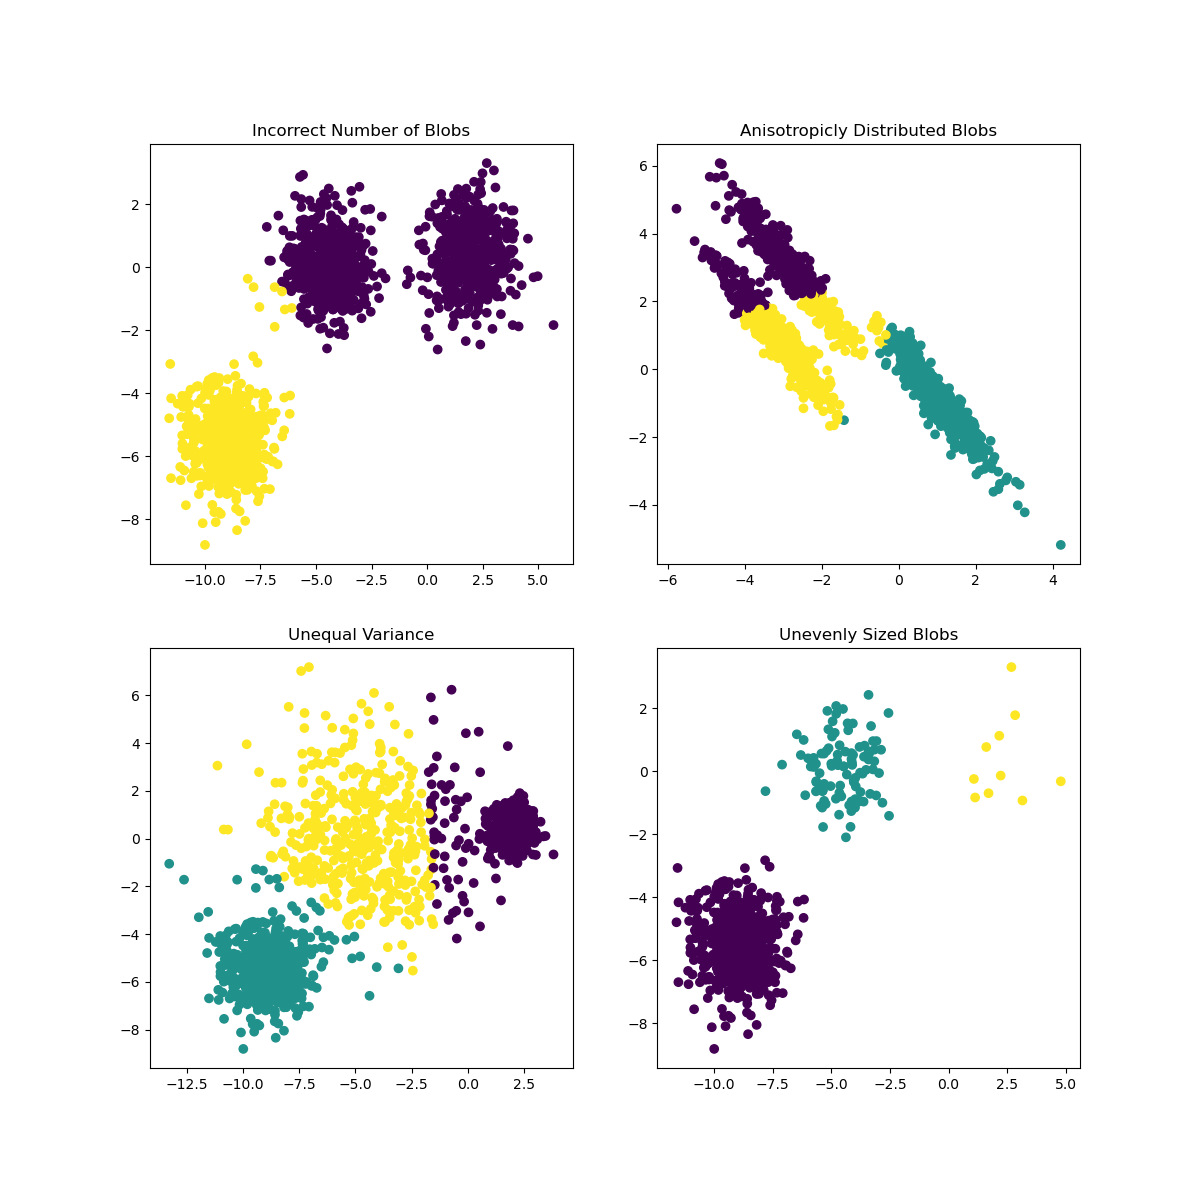